In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#对中文字符的处理
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
#让坐标轴能够正常显示正负号
plt.rcParams['axes.unicode_minus']

True

- 导入数据

In [2]:
data=pd.read_csv('l2_week2.csv')

- 略微观察一下数据

In [3]:
data[:10]

,revenue,gender,age,engaged_last_30,lifecycle,days_since_last_order,previous_order_amount,3rd_party_stores
0,72.98,1.0,59.0,0.0,B,4.26,2343.870,0
1,200.99,1.0,51.0,0.0,A,0.94,8539.872,0
2,69.98,1.0,79.0,0.0,C,4.29,1687.646,1
3,649.99,NaN,NaN,NaN,C,14.90,3498.846,0
4,83.59,NaN,NaN,NaN,C,21.13,3968.490,4
5,319.99,1.0,80.0,0.0,C,15.13,2811.491,10
6,140.00,1.0,60.0,0.0,C,11.45,769.990,4
7,51.98,1.0,61.0,0.0,C,3.71,2542.822,1
8,587.99,NaN,NaN,NaN,C,22.42,602.980,10
9,349.99,NaN,NaN,NaN,C,8.26,298.790,3


- 描述性统计

In [4]:
data.describe()

,revenue,gender,age,engaged_last_30,days_since_last_order,previous_order_amount,3rd_party_stores
count,29452.000000,17723.000000,16716.000000,17723.000000,29452.000000,29452.000000,29452.000000
mean,398.288037,0.950742,60.397404,0.073069,7.711348,2348.904830,2.286059
std,960.251728,0.216412,14.823026,0.260257,6.489289,2379.774213,3.538219
min,0.020000,0.000000,18.000000,0.000000,0.130000,0.000000,0.000000
25%,74.970000,1.000000,50.000000,0.000000,2.190000,773.506250,0.000000
50%,175.980000,1.000000,60.000000,0.000000,5.970000,1655.980000,0.000000
75%,499.990000,1.000000,70.000000,0.000000,11.740000,3096.766500,3.000000
max,103466.100000,1.000000,99.000000,1.000000,23.710000,11597.900000,10.000000


In [5]:
#查看列
data.columns

Index(['revenue', 'gender', 'age', 'engaged_last_30', 'lifecycle',
       ' days_since_last_order ', 'previous_order_amount', '3rd_party_stores'],
      dtype='object')

## 缺失值值处理

**1.缺失值查看搜索**

In [6]:
data.isnull()#查找不是空值

,revenue,gender,age,engaged_last_30,lifecycle,days_since_last_order,previous_order_amount,3rd_party_stores
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,True,True,True,False,False,False,False
4,False,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...
29447,False,True,True,True,False,False,False,False
29448,False,False,False,False,False,False,False,False
29449,False,True,True,True,False,False,False,False
29450,False,False,False,False,False,False,False,False


In [21]:
data[data['revenue'].isnull()]
data[data['lifecycle'].isnull()]
data[data['previous_order_amount'].isnull()]
data[data['3rd_party_stores'].isnull()]
data[data[' days_since_last_order '].isnull()]

#这几列都没有缺失值

,revenue,gender,age,engaged_last_30,lifecycle,days_since_last_order,previous_order_amount,3rd_party_stores


**2.查看数据的基本信息，主要是列的信息，更直观反映NAN有多少**

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17723 entries, 0 to 29450
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   revenue                  17723 non-null  float64
 1   gender                   17723 non-null  float64
 2   age                      17723 non-null  float64
 3   engaged_last_30          17723 non-null  float64
 4   lifecycle                17723 non-null  object 
 5    days_since_last_order   17723 non-null  float64
 6   previous_order_amount    17723 non-null  float64
 7   3rd_party_stores         17723 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 1.2+ MB


**3.根据info出来的信息，如果把NAN删除还剩多少数据量？**

In [23]:
29452-16716

12736

In [24]:
12736/29452

0.43243243243243246

因而不能全部删除

### 观察可得,

**缺失值集中在 gender，age，engaged_last_30**

- 其中gender代表性别


- age代表年龄


- engaged_last_30代表最近30天是否有参加活动

**处理方法:**

- 1.先删除这3列全是空值的行

In [25]:
data=data.dropna(axis=0,thresh=6)

#一共有8列特征值，有5列是所有行都没有缺失值的
#如果该行非缺失值小于6，即5，说明有三列缺失值，那么就把这一行删除

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17723 entries, 0 to 29450
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   revenue                  17723 non-null  float64
 1   gender                   17723 non-null  float64
 2   age                      17723 non-null  float64
 3   engaged_last_30          17723 non-null  float64
 4   lifecycle                17723 non-null  object 
 5    days_since_last_order   17723 non-null  float64
 6   previous_order_amount    17723 non-null  float64
 7   3rd_party_stores         17723 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 1.2+ MB


In [27]:
(29454-17723)/29454
# 0.39<0.43,比把所有数据全部删除好一点点
#但是感觉数值丢失得还是很厉害,不过要是这0.4的数据去补预测的话应该误差也大
#那就剩下0.6的数据吧

0.39828206695185714

- 可以看出现在只剩下age的部分数据还有缺失值

**处理age的缺失值**

- 用平均值来补

In [28]:
data['age'].fillna(np.mean(data['age']),inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17723 entries, 0 to 29450
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   revenue                  17723 non-null  float64
 1   gender                   17723 non-null  float64
 2   age                      17723 non-null  float64
 3   engaged_last_30          17723 non-null  float64
 4   lifecycle                17723 non-null  object 
 5    days_since_last_order   17723 non-null  float64
 6   previous_order_amount    17723 non-null  float64
 7   3rd_party_stores         17723 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 1.2+ MB


**再来查看缺失值的情况**

In [29]:
data[data['age'].isnull()]

,revenue,gender,age,engaged_last_30,lifecycle,days_since_last_order,previous_order_amount,3rd_party_stores


In [30]:
data[data['engaged_last_30'].isnull()]

,revenue,gender,age,engaged_last_30,lifecycle,days_since_last_order,previous_order_amount,3rd_party_stores


In [31]:
data[data['gender'].isnull()]

,revenue,gender,age,engaged_last_30,lifecycle,days_since_last_order,previous_order_amount,3rd_party_stores


**就把同时这age，gender，engaged_last_30都是空值的行除去**


**把剩下的age用平均值代替**


**也可以看出，gender和engaged_last_30的空值都是同时这两列为空**

# 异常值处理

- 金额Revenue不可能<0


- 3rd_party_stores不可能<0


- Age 不可能<0，>100为极少数


- Engaged_last_30不可能<0


- Lifecycle不可能为D。。。。


- days_since_last_order 不可能<0


- previous_order_amount 不可能<0

In [32]:
data[data.revenue<0]

,revenue,gender,age,engaged_last_30,lifecycle,days_since_last_order,previous_order_amount,3rd_party_stores


In [33]:
data[data['3rd_party_stores']<0]

,revenue,gender,age,engaged_last_30,lifecycle,days_since_last_order,previous_order_amount,3rd_party_stores


In [34]:
data[data['age']<0]
data[data['age']>100]

,revenue,gender,age,engaged_last_30,lifecycle,days_since_last_order,previous_order_amount,3rd_party_stores


In [35]:
data[data[' days_since_last_order ']<0]

,revenue,gender,age,engaged_last_30,lifecycle,days_since_last_order,previous_order_amount,3rd_party_stores


In [36]:
data[data['previous_order_amount']<0]

,revenue,gender,age,engaged_last_30,lifecycle,days_since_last_order,previous_order_amount,3rd_party_stores


In [37]:
data[data['3rd_party_stores']<0]

,revenue,gender,age,engaged_last_30,lifecycle,days_since_last_order,previous_order_amount,3rd_party_stores


**发现没有异常值**

# 修改一下列名

In [38]:
name=['购买金额','性别','年龄','30内参加活动','生命周期','距离最近一次下单天数','累计购买金额','从第三方商家购买的数量']

In [39]:
data.columns=name

In [40]:
data

,购买金额,性别,年龄,30内参加活动,生命周期,距离最近一次下单天数,累计购买金额,从第三方商家购买的数量
0,72.98,1.0,59.000000,0.0,B,4.26,2343.870,0
1,200.99,1.0,51.000000,0.0,A,0.94,8539.872,0
2,69.98,1.0,79.000000,0.0,C,4.29,1687.646,1
5,319.99,1.0,80.000000,0.0,C,15.13,2811.491,10
6,140.00,1.0,60.000000,0.0,C,11.45,769.990,4
...,...,...,...,...,...,...,...,...
29440,58.99,1.0,29.000000,0.0,A,0.84,808.980,0
29443,36.98,1.0,40.000000,0.0,B,1.77,138.990,0
29445,179.00,0.0,60.397404,0.0,C,13.42,0.000,0
29448,62.97,1.0,53.000000,0.0,C,3.45,3738.912,1


# 刷新index

In [41]:
data.index=range(len(data))

In [42]:
data

,购买金额,性别,年龄,30内参加活动,生命周期,距离最近一次下单天数,累计购买金额,从第三方商家购买的数量
0,72.98,1.0,59.000000,0.0,B,4.26,2343.870,0
1,200.99,1.0,51.000000,0.0,A,0.94,8539.872,0
2,69.98,1.0,79.000000,0.0,C,4.29,1687.646,1
3,319.99,1.0,80.000000,0.0,C,15.13,2811.491,10
4,140.00,1.0,60.000000,0.0,C,11.45,769.990,4
...,...,...,...,...,...,...,...,...
17718,58.99,1.0,29.000000,0.0,A,0.84,808.980,0
17719,36.98,1.0,40.000000,0.0,B,1.77,138.990,0
17720,179.00,0.0,60.397404,0.0,C,13.42,0.000,0
17721,62.97,1.0,53.000000,0.0,C,3.45,3738.912,1


In [43]:
data1=pd.pivot_table(data,index=['生命周期','购买金额'])
data1

30内参加活动  从第三方商家购买的数量         年龄   性别      累计购买金额  距离最近一次下单天数
生命周期 购买金额                                                                  
A    0.83          0.0          0.0  40.000000  1.0   4187.2600        0.84
     1.00          0.0          0.0  67.500000  1.0   3442.5225        0.13
     1.98          0.0          0.0  36.000000  1.0    563.9900        0.48
     3.99          0.0          0.0  71.000000  1.0   1456.9250        0.32
     5.99          0.0          0.0  61.000000  1.0    860.0000        0.13
...                ...          ...        ...  ...         ...         ...
C    10689.11      0.0         10.0  60.397404  1.0  11597.9000        2.19
     13262.40      1.0         10.0  60.397404  1.0  11597.9000        5.42
     16500.00      1.0          6.0  45.000000  1.0  11597.9000        4.84
     20588.97      0.0          3.0  45.000000  1.0  11597.9000        0.13
     29080.80      1.0          3.0  58.000000  1.0   4726.7420       10.87

[8161 rows x 6 columns]

### 画图来观察数据

**饼图**

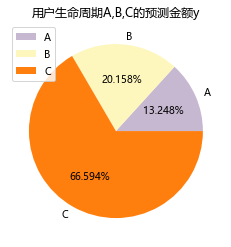

In [47]:
#根据生命周期的3种情况求出每一种类的其他各种特征的总数

group=data.groupby(data['生命周期']).sum()


#自定义颜色
colors=['#c7b8d1','#fef7bd','#ff7f0e'] # 自定义颜色

#画图
plt.pie(x=group.iloc[:,0],
        labels=group.index,
        colors=colors,
        autopct='%.3f%%')

plt.legend(loc='best')

plt.title('用户生命周期A,B,C的预测金额y')

plt.show()

In [48]:
#查看以上饼图划分的3类的基本信息
group

,购买金额,性别,年龄,30内参加活动,距离最近一次下单天数,累计购买金额,从第三方商家购买的数量
生命周期,,,,,,,
A,902622.746,2133.0,131488.636516,188.0,1085.69,7.223142e+06,0
B,1373477.443,3584.0,224253.582077,332.0,9537.70,1.119767e+07,0
C,4537408.745,11133.0,714680.966918,775.0,117221.89,2.670185e+07,34992


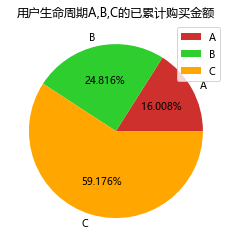

In [49]:
#画图2
colors2=['#ce302d','#2ece2e','#ffa700']
plt.pie(x=group.iloc[:,5],
        labels=group.index,
        colors=colors2,
        autopct='%.3f%%')

plt.legend(loc='best')

plt.title('用户生命周期A,B,C的已累计购买金额')

plt.show()

### 把生命周期利用独热编码转化

In [50]:
columns=pd.get_dummies(data.生命周期)
data=pd.concat([data,columns],axis=1)
data=data.drop('生命周期',axis=1)
data

,购买金额,性别,年龄,30内参加活动,距离最近一次下单天数,累计购买金额,从第三方商家购买的数量,A,B,C
0,72.98,1.0,59.000000,0.0,4.26,2343.870,0,0,1,0
1,200.99,1.0,51.000000,0.0,0.94,8539.872,0,1,0,0
2,69.98,1.0,79.000000,0.0,4.29,1687.646,1,0,0,1
3,319.99,1.0,80.000000,0.0,15.13,2811.491,10,0,0,1
4,140.00,1.0,60.000000,0.0,11.45,769.990,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...
17718,58.99,1.0,29.000000,0.0,0.84,808.980,0,1,0,0
17719,36.98,1.0,40.000000,0.0,1.77,138.990,0,0,1,0
17720,179.00,0.0,60.397404,0.0,13.42,0.000,0,0,0,1
17721,62.97,1.0,53.000000,0.0,3.45,3738.912,1,0,0,1


### 特征选择

In [51]:
#计算相关系数
def cal_coefficient (data):
    #我要预测的值在columns第一个
    x,y=data.iloc[:,1:],data.iloc[:,0]
    cor_list=[]
    for i in x.columns.tolist():
        print(x[i])
        #numpy有计算相关系数的函数
        cor=np.corrcoef(x[i],y)
        print(cor)
        print("  ")
        cor_list.append(cor)
    return cor_list

In [52]:
list=cal_coefficient(data)

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
17718    1.0
17719    1.0
17720    0.0
17721    1.0
17722    1.0
Name: 性别, Length: 17723, dtype: float64
[[1.         0.02378874]
 [0.02378874 1.        ]]
  
0        59.000000
1        51.000000
2        79.000000
3        80.000000
4        60.000000
           ...    
17718    29.000000
17719    40.000000
17720    60.397404
17721    53.000000
17722    69.000000
Name: 年龄, Length: 17723, dtype: float64
[[ 1.         -0.06801317]
 [-0.06801317  1.        ]]
  
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
17718    0.0
17719    0.0
17720    0.0
17721    0.0
17722    0.0
Name: 30内参加活动, Length: 17723, dtype: float64
[[1.         0.07983369]
 [0.07983369 1.        ]]
  
0         4.26
1         0.94
2         4.29
3        15.13
4        11.45
         ...  
17718     0.84
17719     1.77
17720    13.42
17721     3.45
17722    16.87
Name: 距离最近一次下单天数, Length: 17723, dtype: float64
[

**累计购买金额和预测值之间的关系大一点**

In [53]:
data

,购买金额,性别,年龄,30内参加活动,距离最近一次下单天数,累计购买金额,从第三方商家购买的数量,A,B,C
0,72.98,1.0,59.000000,0.0,4.26,2343.870,0,0,1,0
1,200.99,1.0,51.000000,0.0,0.94,8539.872,0,1,0,0
2,69.98,1.0,79.000000,0.0,4.29,1687.646,1,0,0,1
3,319.99,1.0,80.000000,0.0,15.13,2811.491,10,0,0,1
4,140.00,1.0,60.000000,0.0,11.45,769.990,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...
17718,58.99,1.0,29.000000,0.0,0.84,808.980,0,1,0,0
17719,36.98,1.0,40.000000,0.0,1.77,138.990,0,0,1,0
17720,179.00,0.0,60.397404,0.0,13.42,0.000,0,0,0,1
17721,62.97,1.0,53.000000,0.0,3.45,3738.912,1,0,0,1


**两个相关性大的绘点查看**

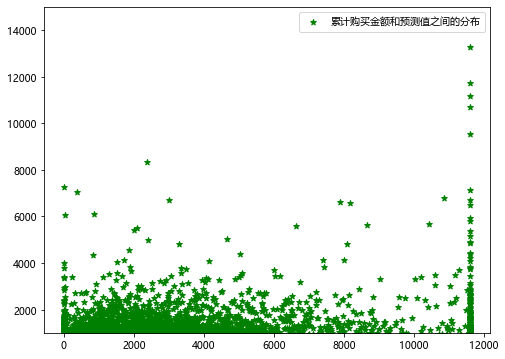

In [54]:
y=data['购买金额']
x=data['累计购买金额']
plt.figure(figsize=(8,6))
plt.scatter(x,y,color='g',marker='*',label='累计购买金额和预测值之间的分布')
plt.legend(loc='best')
plt.ylim(1000,15000)
plt.show()

**划分年龄段**

In [55]:
data['年龄段']=pd.cut(data['年龄'],[0,30,60,100],labels=['青年','中年','老年'])
data

,购买金额,性别,年龄,30内参加活动,距离最近一次下单天数,累计购买金额,从第三方商家购买的数量,A,B,C,年龄段
0,72.98,1.0,59.000000,0.0,4.26,2343.870,0,0,1,0,中年
1,200.99,1.0,51.000000,0.0,0.94,8539.872,0,1,0,0,中年
2,69.98,1.0,79.000000,0.0,4.29,1687.646,1,0,0,1,老年
3,319.99,1.0,80.000000,0.0,15.13,2811.491,10,0,0,1,老年
4,140.00,1.0,60.000000,0.0,11.45,769.990,4,0,0,1,中年
...,...,...,...,...,...,...,...,...,...,...,...
17718,58.99,1.0,29.000000,0.0,0.84,808.980,0,1,0,0,青年
17719,36.98,1.0,40.000000,0.0,1.77,138.990,0,0,1,0,中年
17720,179.00,0.0,60.397404,0.0,13.42,0.000,0,0,0,1,老年
17721,62.97,1.0,53.000000,0.0,3.45,3738.912,1,0,0,1,中年


In [56]:
group=data.groupby(data['年龄段']).sum()
group

,购买金额,性别,年龄,30内参加活动,距离最近一次下单天数,累计购买金额,从第三方商家购买的数量,A,B,C
年龄段,,,,,,,,,,
青年,146045.540,268.0,7917.000000,37.0,2028.65,7.132853e+05,495,41.0,75.0,182.0
中年,3497736.083,7910.0,412058.000000,683.0,60028.71,2.295238e+07,13971,1155.0,1858.0,5304.0
老年,3169727.311,8672.0,650448.185511,575.0,65787.92,2.145701e+07,20526,1043.0,1838.0,6227.0


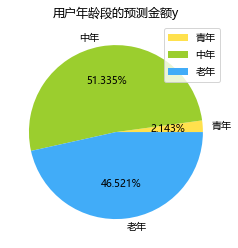

In [59]:
#根据用户真实年龄分类
group=data.groupby(data['年龄段']).sum()


colors3=['#ffe14d','#9bce2e','#41acf8'] # 自定义颜色

plt.pie(x=group.iloc[:,0],
        labels=group.index,
        colors=colors3,
        autopct='%.3f%%')

plt.legend(loc='best')

plt.title('用户年龄段的预测金额y')

plt.show()

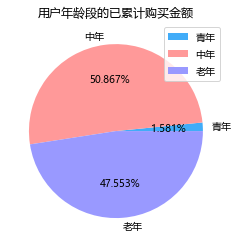

In [60]:
colors4=['#41acf8','#ff9999','#9999ff']
plt.pie(x=group.iloc[:,5],
        labels=group.index,
        colors=colors4,
        autopct='%.3f%%')

plt.legend(loc='best')

plt.title('用户年龄段的已累计购买金额')

plt.show()

### 数据排序

- 根据已经累计购买金额进行排序

In [155]:
data.sort_values(by='累计购买金额',ascending=False)

,购买金额,性别,年龄,30内参加活动,距离最近一次下单天数,累计购买金额,从第三方商家购买的数量,A,B,C,年龄段
13492,877.91,1.0,49.0,1.0,0.81,11597.9,2,0,0,1,中年
14442,874.94,1.0,49.0,0.0,0.58,11597.9,0,1,0,0,中年
13258,600.98,1.0,57.0,1.0,3.23,11597.9,1,0,0,1,中年
17629,1616.91,0.0,42.0,0.0,3.48,11597.9,0,0,1,0,中年
9608,71.96,1.0,65.0,0.0,5.52,11597.9,0,0,0,1,老年
...,...,...,...,...,...,...,...,...,...,...,...
16094,52.98,1.0,33.0,1.0,6.68,0.0,3,0,0,1,中年
16090,33.98,1.0,46.0,0.0,17.87,0.0,10,0,0,1,中年
6389,447.97,0.0,60.0,0.0,13.35,0.0,10,0,0,1,中年
16085,52.97,1.0,67.0,0.0,6.84,0.0,10,0,0,1,老年


In [156]:
data.sort_values(by='购买金额',ascending=False)

,购买金额,性别,年龄,30内参加活动,距离最近一次下单天数,累计购买金额,从第三方商家购买的数量,A,B,C,年龄段
2463,29080.80,1.0,58.000000,1.0,10.87,4726.742,3,0,0,1,中年
7457,22214.92,1.0,44.000000,0.0,0.29,11597.900,0,1,0,0,中年
3284,20588.97,1.0,45.000000,0.0,0.13,11597.900,3,0,0,1,中年
14413,16500.00,1.0,45.000000,1.0,4.84,11597.900,6,0,0,1,中年
17184,13262.40,1.0,60.397404,1.0,5.42,11597.900,10,0,0,1,老年
...,...,...,...,...,...,...,...,...,...,...,...
4776,0.90,1.0,53.000000,0.0,6.87,5611.780,0,0,0,1,中年
14719,0.83,1.0,40.000000,0.0,0.84,4187.260,0,1,0,0,中年
9484,0.10,1.0,92.000000,0.0,7.32,5796.540,0,0,0,1,老年
1978,0.09,1.0,60.397404,0.0,2.58,1457.080,0,0,0,1,老年


## 用其他图绘画来观察一下分布情况

In [157]:
from matplotlib import colors
# 年龄和预测金额
x=data['累计购买金额']
y=data['购买金额']

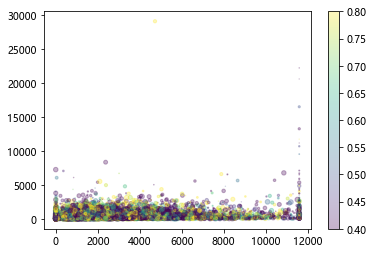

In [158]:
rng = np.random.RandomState(0)
color = rng.rand(17723)
sizes =data['距离最近一次下单天数']


#函数
changecolor = colors.Normalize(vmin=0.4, vmax=0.8)

plt.scatter(x, y, c=color, s=sizes, alpha=0.3, cmap='viridis',norm=changecolor)


#显示颜色条
plt.colorbar()
plt.show()

**条形图**

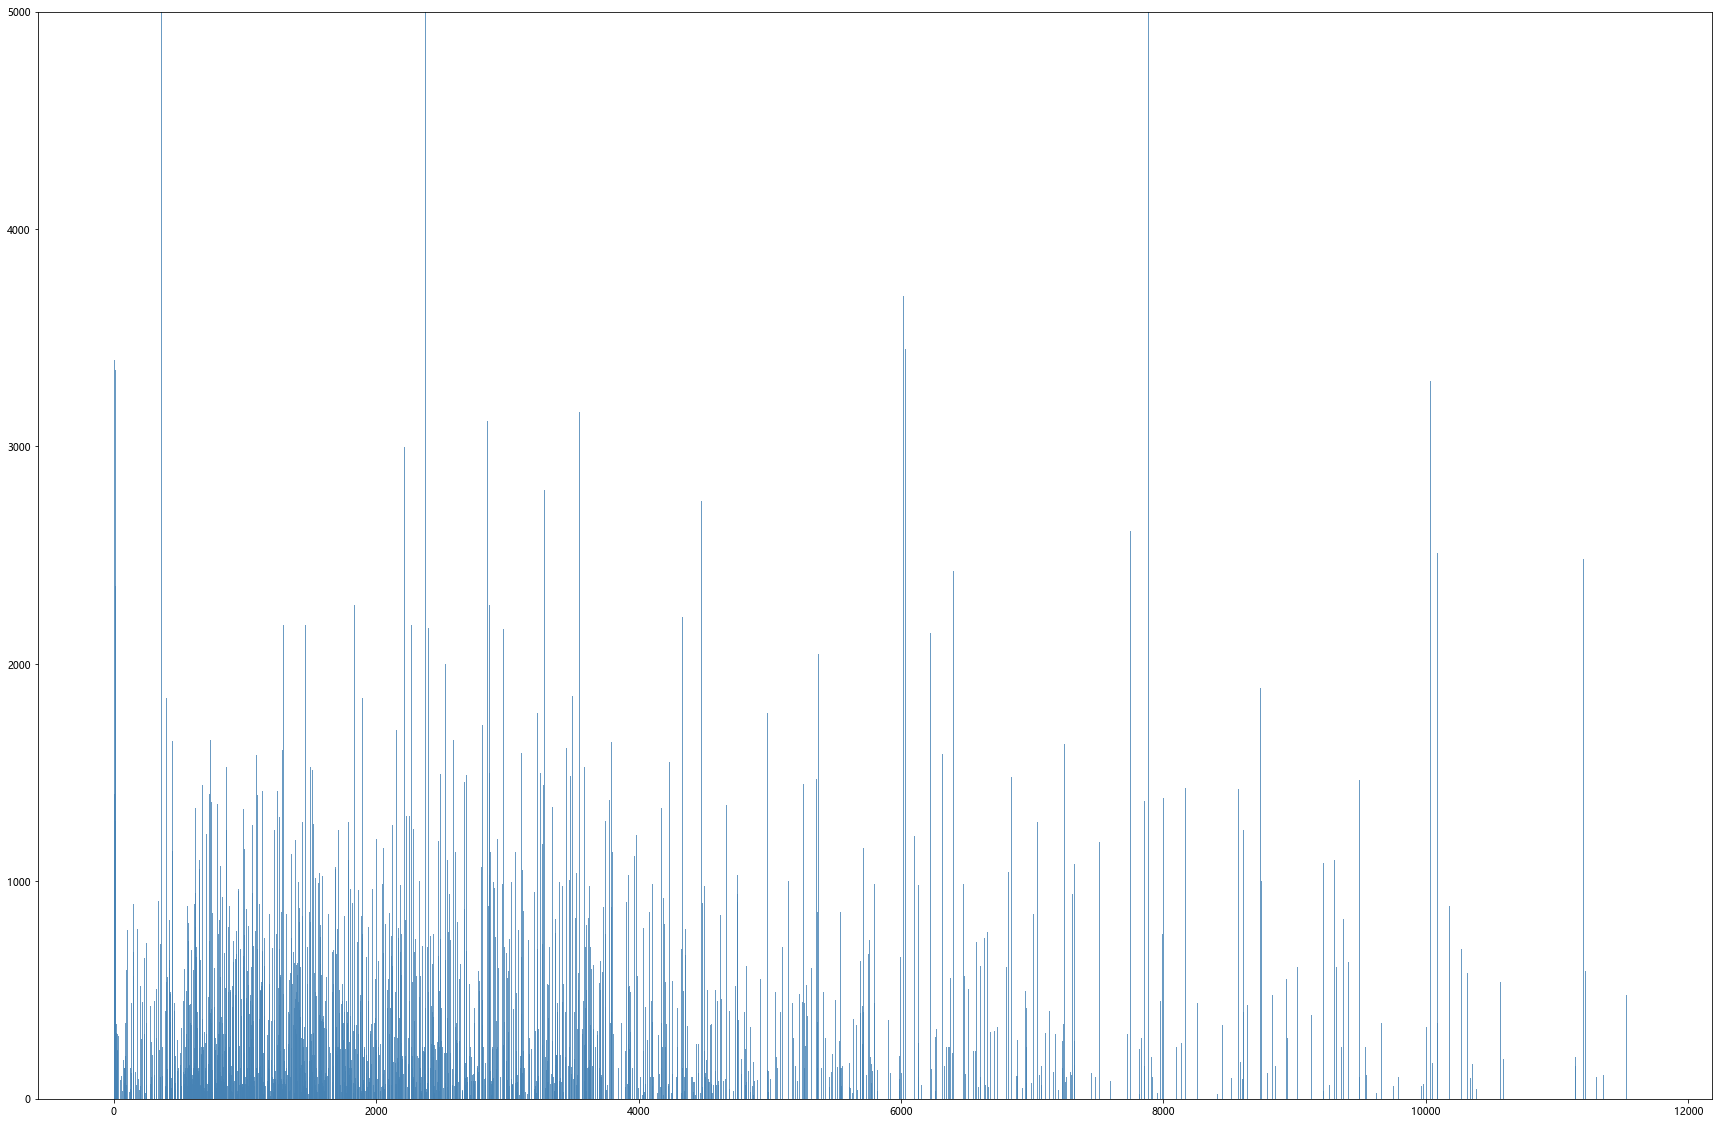

In [159]:
plt.figure(figsize=(30,20))
plt.bar(x,y,align='center',color='steelblue',alpha=0.8)
plt.ylim(0,5000)
plt.show()

In [160]:
data_save=data

### 进行特征选择

**从以上可以看出，'年龄','从第三方商家购买的数量','A','B','C'与预测值相关不强，应该去除，避免拟合时存在过大误差**

方差较大的特征时后面四个：'从第三方商家购买的数量', 'A', 'B', 'C'

- 保留特征相关系数大于0.05的特征

**一元保存，保留那个相关系数最大的特征**

In [163]:
data2=data.drop(['性别','年龄','30内参加活动','距离最近一次下单天数','从第三方商家购买的数量','A','B','C','年龄段'],axis=1)
data2

,购买金额,累计购买金额
0,72.98,2343.870
1,200.99,8539.872
2,69.98,1687.646
3,319.99,2811.491
4,140.00,769.990
...,...,...
17718,58.99,808.980
17719,36.98,138.990
17720,179.00,0.000
17721,62.97,3738.912


**多元保存**

In [164]:
data3=data.drop(['性别','年龄','从第三方商家购买的数量','A','B','C','年龄段'],axis=1)

In [165]:
data3

,购买金额,30内参加活动,距离最近一次下单天数,累计购买金额
0,72.98,0.0,4.26,2343.870
1,200.99,0.0,0.94,8539.872
2,69.98,0.0,4.29,1687.646
3,319.99,0.0,15.13,2811.491
4,140.00,0.0,11.45,769.990
...,...,...,...,...
17718,58.99,0.0,0.84,808.980
17719,36.98,0.0,1.77,138.990
17720,179.00,0.0,13.42,0.000
17721,62.97,0.0,3.45,3738.912


In [166]:
#一元
data2.to_csv('data_2_clean.csv')

In [167]:
#多元
data3.to_csv('data_3_clean.csv')